<a href="https://colab.research.google.com/github/rajandasguptaml/Dataset-Sampling/blob/main/Thesis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Born", "Death"]

In [6]:
data = pd.read_csv('neodeath.csv',sep=',')
data.head()


,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,cd_apgar1,cd_apgar5,newborn_weight,has_congenital_malformation,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group,neonataldeath
0,1,32,2,4,1,0,5,1,2,4,9,10,3655,2,1.0,1,0,1,39,1.0,1.0,5.0,5.0,0
1,1,40,1,3,4,1,5,1,2,4,9,9,3540,2,4.0,5,4,0,40,2.0,1.0,5.0,7.0,0
2,1,31,2,5,1,0,5,1,2,4,8,10,3015,2,1.0,1,0,1,39,1.0,1.0,2.0,5.0,0
3,1,19,5,4,2,0,5,1,1,4,8,9,3220,2,4.0,2,2,0,39,1.0,1.0,5.0,4.0,0
4,1,33,1,4,5,0,5,1,1,2,9,10,3210,2,2.0,5,5,0,40,1.0,2.0,2.0,3.0,0


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829257 entries, 0 to 829256
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   tp_birth_place               829257 non-null  int64  
 1   maternal_age                 829257 non-null  int64  
 2   tp_marital_status            829257 non-null  int64  
 3   tp_maternal_education_years  829257 non-null  int64  
 4   num_live_births              829257 non-null  int64  
 5   num_fetal_losses             829257 non-null  int64  
 6   tp_pregnancy_duration        829257 non-null  int64  
 7   tp_pregnancy                 829257 non-null  int64  
 8   tp_labor                     829257 non-null  int64  
 9   tp_prenatal_appointments     829257 non-null  int64  
 10  cd_apgar1                    829257 non-null  int64  
 11  cd_apgar5                    829257 non-null  int64  
 12  newborn_weight               829257 non-null  int64  
 13 

In [8]:
data.isnull().values.any()

True

In [9]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["neonataldeath"]]
# Store the variable we are predicting 
target = "neonataldeath"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(829257, 23)
(829257,)


Text(0, 0.5, 'Total Baby')

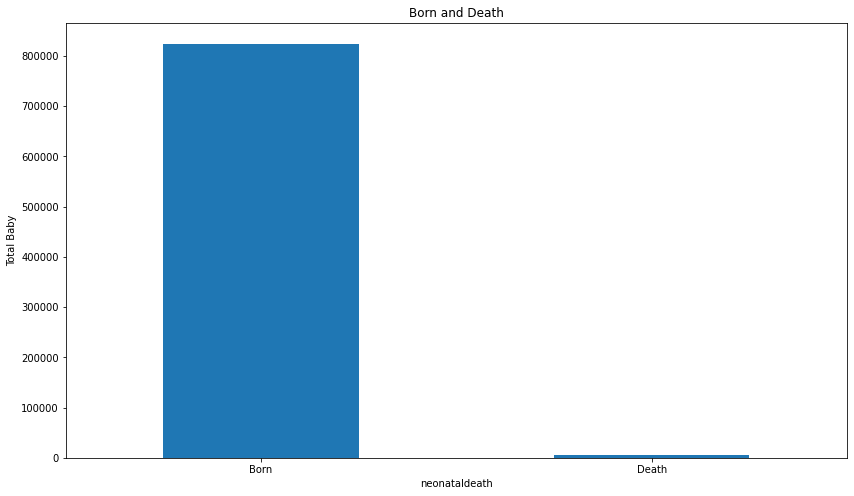

In [10]:
count_classes = pd.value_counts(data['neonataldeath'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Born and Death")

plt.xticks(range(2), LABELS)

plt.xlabel("neonataldeath")

plt.ylabel("Total Baby")

In [11]:
born = data[data['neonataldeath']==1]

death = data[data['neonataldeath']==0]

In [12]:
print(born.shape,death.shape)


(5152, 24) (824105, 24)


In [13]:
from imblearn.under_sampling import NearMiss

In [14]:
from imblearn import under_sampling as nm

nm.NearMiss(
    sampling_strategy='auto',
    version=1,
    n_neighbors=3,
    n_neighbors_ver3=3,
    n_jobs=None,
)


NearMiss()

In [15]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, Y_res = under_sampler.fit_resample(X, Y)

In [16]:
X_res.shape,Y_res.shape


((10304, 23), (10304,))

In [17]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_res)))

Original dataset shape Counter({0: 824105, 1: 5152})
Resampled dataset shape Counter({0: 5152, 1: 5152})


In [18]:
df = pd.read_csv("neodeath.csv")

In [19]:
df 

,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,cd_apgar1,cd_apgar5,newborn_weight,has_congenital_malformation,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group,neonataldeath
0,1,32,2,4,1,0,5,1,2,4,9,10,3655,2,1.0,1,0,1,39,1.0,1.0,5.0,5.0,0
1,1,40,1,3,4,1,5,1,2,4,9,9,3540,2,4.0,5,4,0,40,2.0,1.0,5.0,7.0,0
2,1,31,2,5,1,0,5,1,2,4,8,10,3015,2,1.0,1,0,1,39,1.0,1.0,2.0,5.0,0
3,1,19,5,4,2,0,5,1,1,4,8,9,3220,2,4.0,2,2,0,39,1.0,1.0,5.0,4.0,0
4,1,33,1,4,5,0,5,1,1,2,9,10,3210,2,2.0,5,5,0,40,1.0,2.0,2.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829252,1,18,1,4,0,0,5,1,1,4,9,10,3285,2,4.0,0,0,0,39,1.0,2.0,5.0,1.0,0
829253,1,37,2,5,1,1,5,1,1,4,9,10,3085,2,1.0,2,1,0,37,1.0,1.0,2.0,4.0,0
829254,1,29,2,5,0,0,5,1,2,4,8,9,3685,2,1.0,0,0,0,39,1.0,1.0,5.0,2.0,0
829255,1,18,1,5,0,0,4,1,1,2,7,8,2385,2,4.0,0,0,0,35,1.0,2.0,5.0,10.0,0


In [20]:
df.isnull().sum()

tp_birth_place                  0
maternal_age                    0
tp_marital_status               0
tp_maternal_education_years     0
num_live_births                 0
num_fetal_losses                0
tp_pregnancy_duration           0
tp_pregnancy                    0
tp_labor                        0
tp_prenatal_appointments        0
cd_apgar1                       0
cd_apgar5                       0
newborn_weight                  0
has_congenital_malformation     0
tp_maternal_skin_color         40
num_gestations                  0
num_normal_labors               0
num_cesarean_labors             0
num_gestational_weeks           0
tp_presentation_newborn        40
tp_childbirth_assistance       40
tp_fill_form_responsible       40
cd_robson_group                36
neonataldeath                   0
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [54]:
df=df.dropna(axis = 1, how = 'all')

In [55]:
x = df.drop(['neonataldeath'],axis = 1)

In [56]:
y=df['neonataldeath']

In [57]:
X

,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,cd_apgar1,cd_apgar5,newborn_weight,has_congenital_malformation,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group
0,1,32,2,4,1,0,5,1,2,4,9,10,3655,2,1.0,1,0,1,39,1.0,1.0,5.0,5.0
1,1,40,1,3,4,1,5,1,2,4,9,9,3540,2,4.0,5,4,0,40,2.0,1.0,5.0,7.0
2,1,31,2,5,1,0,5,1,2,4,8,10,3015,2,1.0,1,0,1,39,1.0,1.0,2.0,5.0
3,1,19,5,4,2,0,5,1,1,4,8,9,3220,2,4.0,2,2,0,39,1.0,1.0,5.0,4.0
4,1,33,1,4,5,0,5,1,1,2,9,10,3210,2,2.0,5,5,0,40,1.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829252,1,18,1,4,0,0,5,1,1,4,9,10,3285,2,4.0,0,0,0,39,1.0,2.0,5.0,1.0
829253,1,37,2,5,1,1,5,1,1,4,9,10,3085,2,1.0,2,1,0,37,1.0,1.0,2.0,4.0
829254,1,29,2,5,0,0,5,1,2,4,8,9,3685,2,1.0,0,0,0,39,1.0,1.0,5.0,2.0
829255,1,18,1,5,0,0,4,1,1,2,7,8,2385,2,4.0,0,0,0,35,1.0,2.0,5.0,10.0


In [58]:
x.isnull().sum()

tp_birth_place                 0
maternal_age                   0
tp_marital_status              0
tp_maternal_education_years    0
num_live_births                0
num_fetal_losses               0
tp_pregnancy_duration          0
tp_pregnancy                   0
tp_labor                       0
tp_prenatal_appointments       0
cd_apgar1                      0
cd_apgar5                      0
newborn_weight                 0
has_congenital_malformation    0
tp_maternal_skin_color         0
num_gestations                 0
num_normal_labors              0
num_cesarean_labors            0
num_gestational_weeks          0
tp_presentation_newborn        0
tp_childbirth_assistance       0
tp_fill_form_responsible       0
cd_robson_group                0
dtype: int64

In [60]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.25, random_state =1)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model = LogisticRegression()

In [63]:
model

LogisticRegression()

In [64]:
model.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [65]:
model.score(xtest,ytest)

0.994351318106172

In [66]:
# logistic regression sigmoid function value check
model.predict_proba(xtest)

array([[9.99563641e-01, 4.36359332e-04],
       [9.99370398e-01, 6.29601818e-04],
       [9.99088092e-01, 9.11908185e-04],
       ...,
       [9.99657283e-01, 3.42717427e-04],
       [9.99733121e-01, 2.66879040e-04],
       [9.96341619e-01, 3.65838079e-03]])

In [87]:
from sklearn.neighbors import KNeighborsClassifier

kmodel = KNeighborsClassifier(n_neighbors=3)

In [88]:
kmodel.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [90]:
pred = kmodel.predict(xtest)